<a href="https://colab.research.google.com/github/alibagheribardi/Erdos_Project/blob/main/Projec1_Regression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_iris

def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores



In [51]:
# Load iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)  # Convert to DataFrame
y_iris = iris.target
iris_features = iris.feature_names

# Run feature prioritization
iris_scores = features_prioritization(X_iris, y_iris, iris_features)
print("🔎 Feature Group Performance Summary:")
print(iris_scores)

🔎 Feature Group Performance Summary:
             Feature  R2_Score
2  petal length (cm)    0.9496
3   petal width (cm)    0.9464
0  sepal length (cm)    0.6916
1   sepal width (cm)   -0.1940


In [53]:
# Categorize features by R² score
strong_features = iris_scores[iris_scores['R2_Score'] > 0.9]['Feature'].tolist()
medium_features = iris_scores[(iris_scores['R2_Score'] > 0.6) & (iris_scores['R2_Score'] <= 0.9)]['Feature'].tolist()
poor_features = iris_scores[iris_scores['R2_Score'] <= 0.6]['Feature'].tolist()

# Function to safely compute KNN R² score
def knn_score(X, y, selected_features):
    if not selected_features:  # Handle empty groups
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    return model.score(X_subset, y)

# Compute scores
r2_all = knn_score(X_iris, y_iris, iris_features)
r2_strong = knn_score(X_iris, y_iris, strong_features)
r2_medium = knn_score(X_iris, y_iris, medium_features)
r2_poor = knn_score(X_iris, y_iris, poor_features)

# Summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features', 'Poor Features'],
    'R2_Score': [r2_all, r2_strong, r2_medium, r2_poor]
})

print("🔎 Feature Group Performance Summary:")
print(summary_df)

🔎 Feature Group Performance Summary:
     Feature_Group  R2_Score
0     All Features    0.9700
1  Strong Features    0.9672
2  Medium Features    0.6916
3    Poor Features   -0.1940


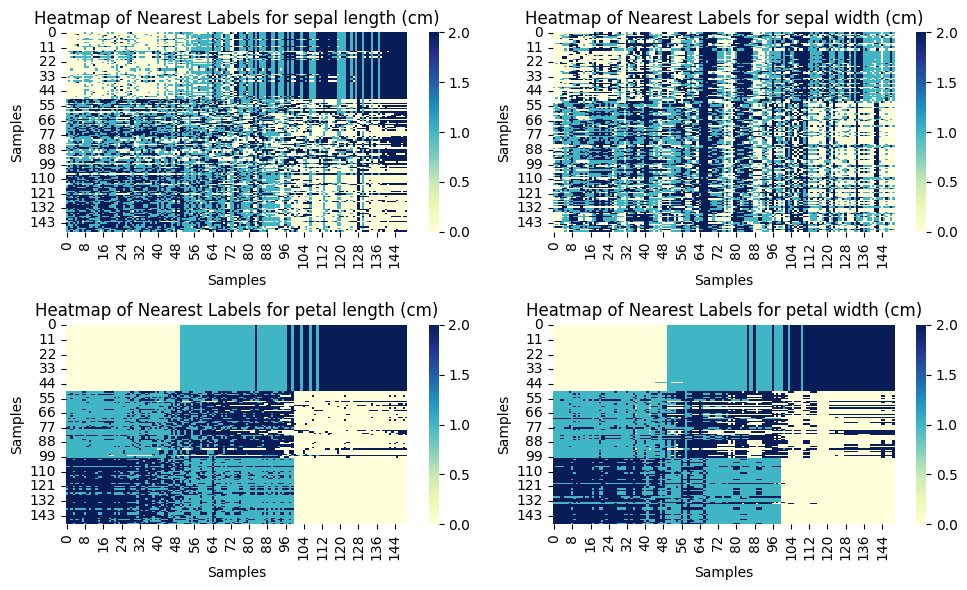

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def id_matrix(X, y, features):
    # Determine the number of rows and columns for the grid
    n_plots = len(features)
    n_rows = (n_plots + 1) // 2  # Compute the number of rows (round up for odd numbers)

    # Create a figure with subplots (2 columns per row)
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, 3 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        values = X[feature].values.reshape(-1, 1)  # Ensure 2D for broadcasting

        # Compute pairwise absolute distance matrix
        dist_mat = np.abs(values - values.T)

        # Get sorted indices based on distances
        sorted_indices = np.argsort(dist_mat, axis=1)

        # Get nearest labels using sorted indices
        nearest_labels = y[sorted_indices]

        # Plot heatmap for nearest labels
        sns.heatmap(nearest_labels, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
        axes[i].set_title(f'Heatmap of Nearest Labels for {feature}')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Samples')

    # Hide unused subplots if number of plots is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    return



# Call the id_matrix function
id_matrix(X_iris, y_iris, iris_features)
